In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/font_manager.py:281: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [2]:
df = pd.read_json("sorted_simul_dump.json")

In [3]:
df.head()

,bias,inequality,segregation
0,0.0,1.021505,13
1,0.1,1.215909,13
2,0.2,1.407256,13
3,0.3,1.729814,13
4,0.4,1.852556,13


In [4]:
import seaborn as sns

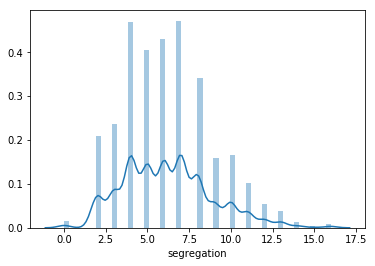

In [5]:
sns.distplot(df['segregation'])

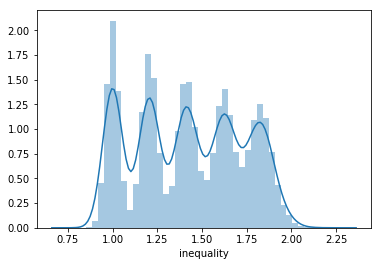

In [6]:
sns.distplot(df['inequality'])

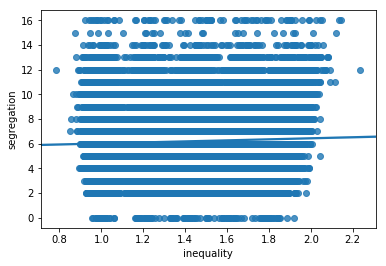

In [7]:
sns.regplot(df["inequality"], df["segregation"])

In [8]:
from mpl_toolkits import mplot3d

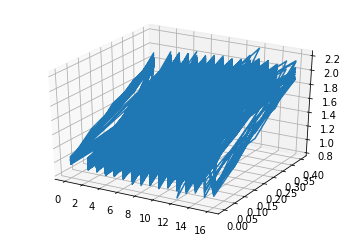

In [9]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot3D(df["segregation"], df["bias"], df["inequality"])

In [10]:
df.groupby('bias')['inequality'].mean()

bias
0.0    1.000646
0.1    1.208446
0.2    1.418168
0.3    1.628886
0.4    1.837113
Name: inequality, dtype: float64

In [11]:
import statsmodels.api as sm

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [12]:
df.groupby('segregation')['inequality'].mean()

segregation
0     1.403754
2     1.403116
3     1.405892
4     1.407464
5     1.408614
6     1.416122
7     1.419680
8     1.426125
9     1.431299
10    1.438470
11    1.448207
12    1.458083
13    1.468593
14    1.473405
15    1.466461
16    1.498787
Name: inequality, dtype: float64

In [13]:
df['inequality'].mean()

1.4186518405648445

In [14]:
lm = sm.OLS(df[['segregation', 'bias']], sm.add_constant(df['inequality'])).fit()

In [15]:
lm.summary()

ValueError: shapes (25000,2) and (25000,2) not aligned: 2 (dim 1) != 25000 (dim 0)

In [16]:
# wait, I'm an idiot.  Let's actually have a brain shall we, and not swap x and y?
lm = sm.OLS(df['inequality'], sm.add_constant(df[['segregation', 'bias']])).fit()

In [17]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             inequality   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                 4.217e+05
Date:                Sat, 21 Jul 2018   Prob (F-statistic):               0.00
Time:                        23:54:25   Log-Likelihood:                 38912.
No. Observations:               25000   AIC:                        -7.782e+04
Df Residuals:                   24997   BIC:                        -7.779e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.9674      0.001   1037.157      0.000       0.966       0.969
segregation     0.0053      0.000     43.683      0.000       0.005       0.005
bias            2.0934      0.002    917.317      0.000       2.089       2.098
==============================================================================
Omnibus:                      497.186   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              770.538
Skew:                           0.207   Prob(JB):                    4.78e-168
Kurtosis:                       3.754   Cond. No.                         49.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""